In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv(r"F:\internship\car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [10]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
df["Selling_type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [22]:
df["Year"].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [8]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [15]:
df["Fuel_Type"]=l.fit_transform(df["Fuel_Type"])
df["Selling_type"]=l.fit_transform(df["Selling_type"])
df["Transmission"]=l.fit_transform(df["Transmission"])
df["Car_Name"]=l.fit_transform(df["Car_Name"])

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [63]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [17]:
df.describe()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,62.571429,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189
std,25.573535,2.891554,5.082812,8.642584,38886.883882,0.425801,0.478439,0.340021,0.247915
min,0.000000,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,69.000000,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,82.000000,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000
max,97.000000,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


<Axes: >

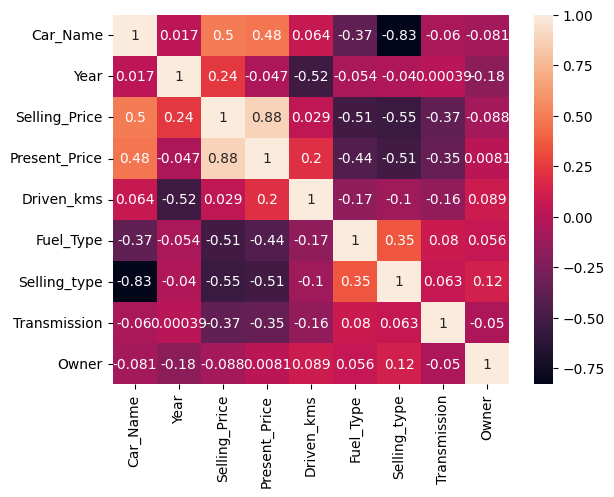

In [18]:
import seaborn as sns
r=df.corr()
sns.heatmap(r,annot=True)

In [19]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

<Axes: ylabel='Year'>

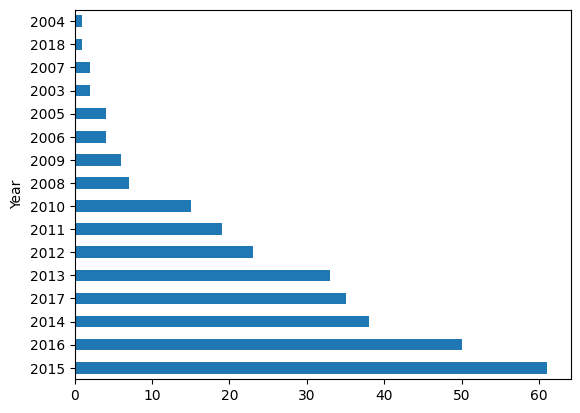

In [27]:
df['Year'].value_counts().plot(kind="barh")

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, '')]]

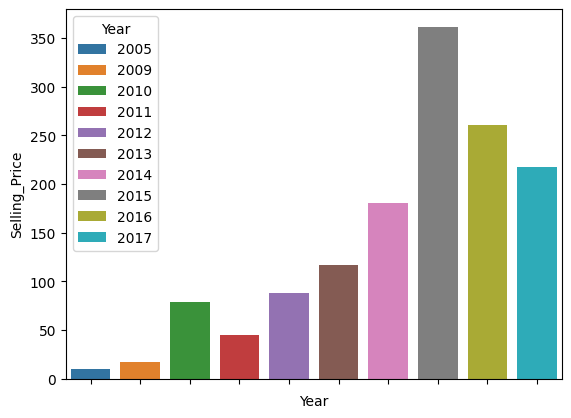

In [37]:
g = df.groupby('Year', as_index=False)['Selling_Price'].sum().sort_values(by='Selling_Price', ascending=False).head(10)
sns.barplot(data=g, x='Year', y='Selling_Price', hue='Year', dodge=False).set(xticklabels=[])

Text(0, 0.5, 'count')

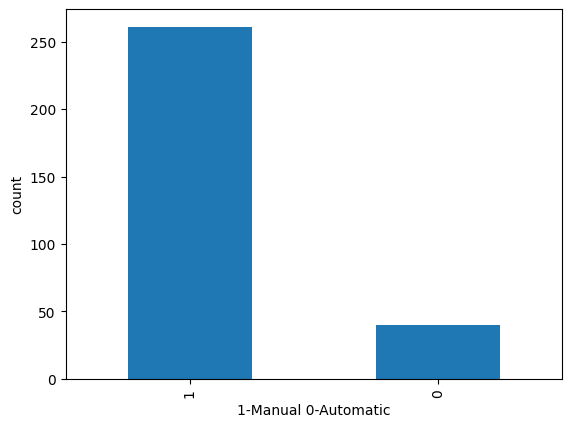

In [62]:
df["Transmission"].value_counts().plot(kind="bar")
plt.xlabel("1-Manual 0-Automatic")
plt.ylabel("count")

In [39]:
x=df[[ 'Year', 'Present_Price', 'Driven_kms',
       'Fuel_Type',  'Transmission']]
y=df.Selling_Price.values

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
lin=LinearRegression()

In [45]:
lin.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred=lin.predict(x_test)

In [53]:
from sklearn.metrics import mean_squared_error
print("The error is :",mean_squared_error(y_test,y_pred))

The error is : 3.2744713643049637


In [54]:
print("The accuracy of the model is : ",100-mean_squared_error(y_test,y_pred))

The accuracy of the model is :  96.72552863569504
